# Autoencoders

In [1]:
from __future__ import absolute_import, division, print_function,unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import time, os, glob
import PIL
from IPython import display
from keras import backend as K

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer =  autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [3]:
autoencoder.compile(optimizer='Adam', loss = 'binary_crossentropy')

In [4]:
(x_train, _), (x_test,_) =  tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [5]:
history = autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2753 - val_loss: 0.1900
Epoch 2/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1713 - val_loss: 0.1536
Epoch 3/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1440 - val_loss: 0.1332
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1282 - val_loss: 0.1211
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1185 - val_loss: 0.1132
Epoch 6/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1068 - val_loss: 0.1034
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1031 - val_loss: 0.1002
Epoch 9/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1002 - val_loss: 0.0978
Epoch

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

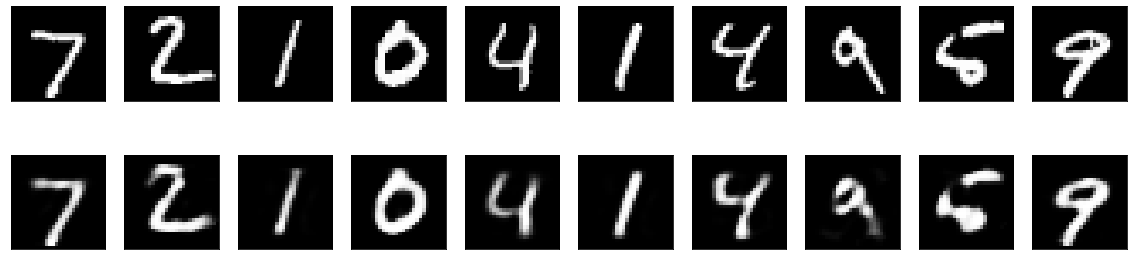

In [7]:
n = 10
plt.figure(figsize=(20,5))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding a Sparsity constraint on the encoded representations

In [8]:
#Sparsity is  known for better feature extraction by adding an appropriate term to the cost function.
#The autoencoder is pushed to reduce the number of active neurons in the coding layer or latent_dim.
#Average activation of each neuron is computed given the whole training batch_size.
#Batch_size must not be too small or the mean will not be accurate.
#Relative importance of sparsity loss & reconstruction loss is to multiple sparsity loss with sparsity weight hyperparameter.

from keras import regularizers
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu',kernel_regularizer = regularizers.l2(0.00001))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [9]:
autoencoder.compile(optimizer='Adam', loss = 'binary_crossentropy')

In [10]:
history = autoencoder.fit(x_train,x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2800 - val_loss: 0.1940
Epoch 2/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.1740 - val_loss: 0.1566
Epoch 3/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1473 - val_loss: 0.1372
Epoch 4/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1321 - val_loss: 0.1251
Epoch 5/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1219 - val_loss: 0.1164
Epoch 6/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1148 - val_loss: 0.1105
Epoch 7/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1096 - val_loss: 0.1060
Epoch 8/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1057 - val_loss: 0.1033
Epoch 9/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1028 - val_loss: 0.1

In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

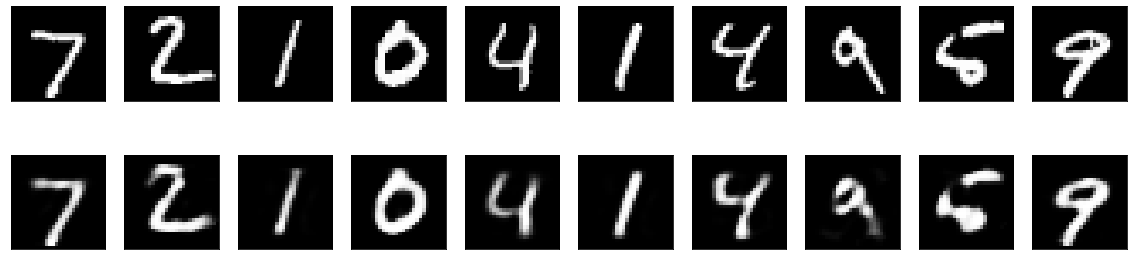

In [12]:
n = 10
plt.figure(figsize=(20,5))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder

In [13]:
#Few labeled samples or data to work with, pretrained layers can be re-used.
input_img = Input(shape=(784,))
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(63, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

autoencoder.fit(x_train,x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2516 - val_loss: 0.1720
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1521 - val_loss: 0.1359
Epoch 3/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1302 - val_loss: 0.1235
Epoch 4/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1203 - val_loss: 0.1157
Epoch 5/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1147 - val_loss: 0.1111
Epoch 6/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1109 - val_loss: 0.1076
Epoch 7/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1075 - val_loss: 0.1043
Epoch 8/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1046 - val_loss: 0.1024
Epoch 9/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1023 - val_loss: 0.1

Epoch 77/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0817 - val_loss: 0.0816
Epoch 78/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0817 - val_loss: 0.0816
Epoch 79/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0816 - val_loss: 0.0814
Epoch 80/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0816 - val_loss: 0.0820
Epoch 81/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0816 - val_loss: 0.0813
Epoch 82/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0815 - val_loss: 0.0812
Epoch 83/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0815 - val_loss: 0.0814
Epoch 84/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0814 - val_loss: 0.0815
Epoch 85/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0814 - val_loss: 0.0815
Epoch 86/100
60000/60000 [===========

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

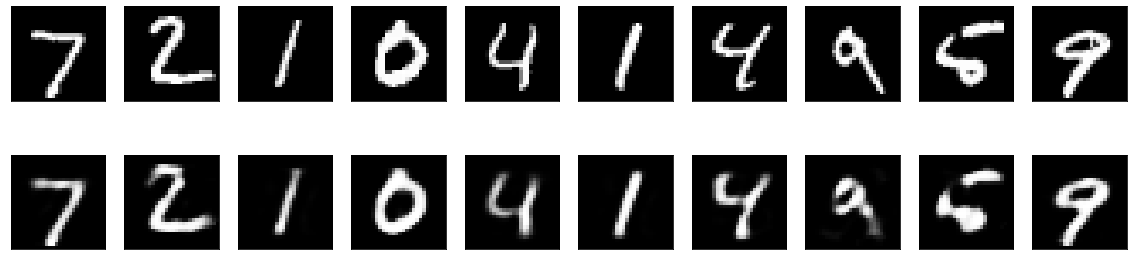

In [16]:
n = 10
plt.figure(figsize=(20,5))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [17]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3 ), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3 ), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3 ), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2116 - val_loss: 0.1608
Epoch 2/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1531 - val_loss: 0.1433
Epoch 3/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1399 - val_loss: 0.1334
Epoch 4/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1325 - val_loss: 0.1316
Epoch 5/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1274 - val_loss: 0.1216
Epoch 6/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1237 - val_loss: 0.1194
Epoch 7/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1205 - val_loss: 0.1188
Epoch 8/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1181 - val_loss: 0.1150
Epoch 9/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1164 - val_loss: 0.1171
Epoch

C:\Users\User\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


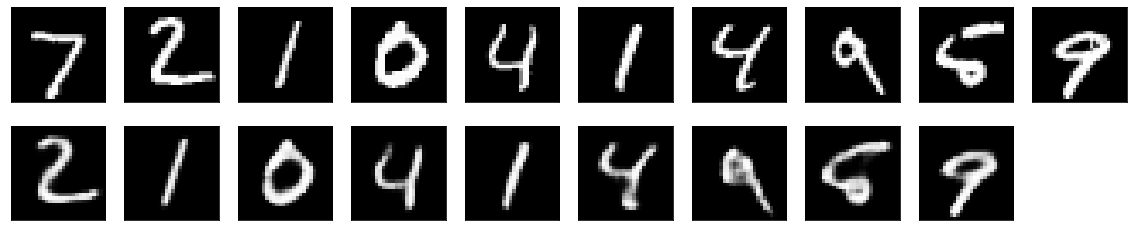

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
     # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

     # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

# Application to Image Denoising

In [22]:
#Noise helps because the autoencoder doesn't just copy inputs to outputs
#The noise can be pure gaussian noise added to inputs

(x_train,_),(x_test,_) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size= x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.,1.)
x_test_noisy = np.clip(x_test_noisy, 0.,1.)

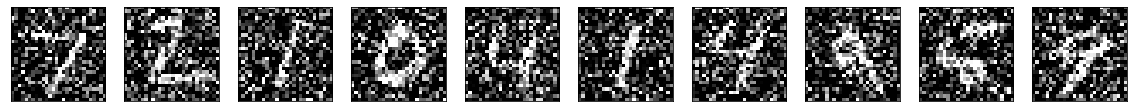

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
#UpSampling is used for model reconstruction.

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [27]:
autoencoder.fit(x_train, x_train, epochs=50, shuffle=True, validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0667 - val_loss: 0.0669
Epoch 2/50
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0664 - val_loss: 0.0659
Epoch 3/50
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0663 - val_loss: 0.0657
Epoch 4/50
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0661 - val_loss: 0.0662
Epoch 5/50
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0659 - val_loss: 0.0651
Epoch 6/50
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 7/50
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0656 - val_loss: 0.0650
Epoch 8/50
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0655 - val_loss: 0.0647
Epoch 9/50
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0654 - val_loss: 0.0

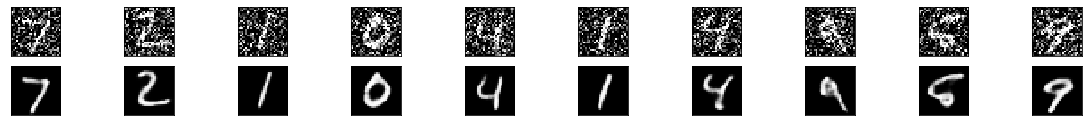

In [28]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    #Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Sequence-to-sequence autoencoder
- when inputs are sequences rather than vectors or 2D images, use encoder to decoder type of model that can capture temporal structure.

In [31]:
#RepeatVector is used to repeat a set of inputs n times.

from keras.layers import Input, LSTM, RepeatVector
timesteps = 10
input_dim = 32
latent_dim = 64

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [32]:
encoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
Total params: 24,832
Trainable params: 24,832
Non-trainable params: 0
_________________________________________________________________
